In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hits1970 = pd.read_csv('hits1970.csv')
hits1980 = pd.read_csv('hits1980.csv')
hits1990 = pd.read_csv('hits1990.csv')
hits2000 = pd.read_csv('hits2000.csv')
hits2010 = pd.read_csv('hits2010.csv')
hits2022 = pd.read_csv('hits2022.csv')


In [2]:
hits1970 = hits1970.drop(hits1970.tail(n=223).index, inplace = False)
hits1980 = hits1980.drop(hits1980.tail(n=62).index, inplace = False)
hits1990 = hits1990.drop(hits1990.tail(n=170).index, inplace = False)
hits2000 = hits2000.drop(hits2000.tail(n=239).index, inplace = False)
hits2010 = hits2010.drop(hits2010.tail(n=79).index, inplace = False)
hits2022 = hits2022.drop(hits2022.tail(n=1).index, inplace = False)

In [3]:
pd.set_option('display.max_columns', None)
df = pd.concat([hits1970, hits1980, hits1990, hits2000, hits2010, hits2022])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3645 entries, 0 to 619
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3645 non-null   object 
 1   album             3645 non-null   object 
 2   artist            3645 non-null   object 
 3   id                3645 non-null   object 
 4   release_date      3645 non-null   object 
 5   popularity        3645 non-null   int64  
 6   length            3645 non-null   int64  
 7   danceability      3645 non-null   float64
 8   acousticness      3645 non-null   float64
 9   energy            3645 non-null   float64
 10  instrumentalness  3645 non-null   float64
 11  liveness          3645 non-null   float64
 12  valence           3645 non-null   float64
 13  loudness          3645 non-null   float64
 14  speechiness       3645 non-null   float64
 15  tempo             3645 non-null   float64
 16  key               3645 non-null   int64  
 

In [5]:
df.isnull().sum()

name                0
album               0
artist              0
id                  0
release_date        0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
dtype: int64

In [6]:
df.isna().sum()

name                0
album               0
artist              0
id                  0
release_date        0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
dtype: int64

In [7]:
df.nunique()

name                3190
album               2496
artist              1578
id                  3340
release_date        1467
popularity            99
length              3018
danceability         735
acousticness        1767
energy               813
instrumentalness    1586
liveness             987
valence              907
loudness            2870
speechiness          984
tempo               3179
key                   12
time_signature         4
dtype: int64

In [8]:
print("Anzahl Einträge im Datensatzes: {}".format(df.shape[0]))
print("Anzahl Spalten im Datensatzes: {}".format(df.shape[1]))

Anzahl Einträge im Datensatzes: 3645
Anzahl Spalten im Datensatzes: 18


In [9]:
df.describe()

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
count,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000
mean,52.368724,233772.623594,0.638810,0.191201,0.683494,0.059103,0.185904,0.584714,-7.881330,0.103960,119.963297,5.379424,3.968724
std,23.961060,63597.958288,0.167419,0.239518,0.202536,0.192401,0.149174,0.238760,4.363055,0.105753,26.778000,3.595729,0.248174
min,0.000000,92866.000000,0.063200,0.000002,0.002800,0.000000,0.013600,0.034000,-41.594000,0.022400,46.660000,0.000000,1.000000
25%,41.000000,193200.000000,0.532000,0.019400,0.568000,0.000000,0.088800,0.405000,-9.526000,0.037100,98.994000,2.000000,4.000000
50%,58.000000,225040.000000,0.659000,0.089500,0.717000,0.000015,0.126000,0.603000,-6.835000,0.054500,119.771000,6.000000,4.000000
75%,70.000000,263373.000000,0.761000,0.275000,0.835000,0.001860,0.248000,0.777000,-5.112000,0.123000,134.163000,9.000000,4.000000
max,100.000000,810293.000000,0.988000,0.996000,0.999000,0.982000,0.988000,0.989000,-1.113000,0.863000,216.020000,11.000000,5.000000


In [10]:
df[df.duplicated(subset=['artist', 'length', 'name'], keep=False)].value_counts()
print(len(df))

3645


In [11]:
df = df.drop_duplicates(subset=['artist', 'length', 'name'], keep='first', inplace=False, ignore_index=False)

df.dropna()

print(len(df))

3300


In [12]:
df

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
0,Kiss an Angel Good Mornin',The Essential Charley Pride,Charley Pride,0alXPC11fIucBFD6qcCE94,2006-05-08,49,123133,0.684,0.708,0.4980,0.000000,0.3650,0.9050,-10.836,0.0300,131.855,4,4
1,Linda On My Mind - Single Version,Conway Twitty's Greatest Hits Volume II,Conway Twitty,02q9atOyzjCRfk2uUcfqxe,1976,33,162693,0.383,0.314,0.2920,0.000013,0.0581,0.5930,-15.230,0.0293,104.789,9,4
2,Two Dollars in the Jukebox - 2008 Remaster,Rocky Mountain Music,Eddie Rabbitt,7ueyVuff3whBxbmoanlg4C,1976-10,47,142773,0.759,0.067,0.6210,0.000291,0.0623,0.9210,-12.539,0.0314,134.319,5,4
3,"Midnight, Me And The Blues",All His Great Hits,Mel Tillis,7vRwCuTsBIbV1oVoyPEHrd,1995-01-01,32,170200,0.647,0.843,0.2820,0.001340,0.1820,0.7530,-15.042,0.0319,132.169,3,4
4,Goin' Steady,Golden Hits,Faron Young,4sgQHkppFQrWhAjoQszici,1995-01-01,36,125266,0.492,0.470,0.4280,0.000000,0.2040,0.8710,-13.132,0.0352,165.776,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,"Swedish Rhapsody No. 1, Op. 19 ""Midsummer Vigil""",Classical Music for the Summer,Various Artists,1tAfzDdeNHuFz23RbInMvG,2018-06-22,18,280000,0.447,0.983,0.1660,0.936000,0.0826,0.4340,-18.165,0.0308,100.765,2,4
616,"Ravel: Pavane pour une infante défunte, M. 19",Ravel : Orchestral works,Maurice Ravel,2uDdXmYZlF15iARKksHEew,1992-01-01,31,368133,0.141,0.980,0.0471,0.965000,0.1600,0.0440,-27.300,0.0416,101.894,7,4
617,"Poulenc: Piano Concerto in C-Sharp Minor, FP 1...",Poulenc : Piano Concertos & Aubade,Francis Poulenc,0DVx3v5sCMYOziWG8Naodr,1990-01-01,21,335786,0.121,0.963,0.0175,0.920000,0.1180,0.0400,-23.596,0.0360,174.673,3,3
618,"Chopin: Nocturne No. 8 in D-Flat Major, Op. 27...",Gabriela Montero: Piano Recital,Gabriela Montero,4hbvrHgfZ8lqFrPx1Ztd6j,2005-09-05,51,338253,0.359,0.989,0.0323,0.910000,0.0938,0.0728,-24.408,0.0377,107.169,1,4


# Preprocessing

In [13]:
df = df.drop(['name','album','id', 'release_date'], axis=1)

In [14]:
df

,artist,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
0,Charley Pride,49,123133,0.684,0.708,0.4980,0.000000,0.3650,0.9050,-10.836,0.0300,131.855,4,4
1,Conway Twitty,33,162693,0.383,0.314,0.2920,0.000013,0.0581,0.5930,-15.230,0.0293,104.789,9,4
2,Eddie Rabbitt,47,142773,0.759,0.067,0.6210,0.000291,0.0623,0.9210,-12.539,0.0314,134.319,5,4
3,Mel Tillis,32,170200,0.647,0.843,0.2820,0.001340,0.1820,0.7530,-15.042,0.0319,132.169,3,4
4,Faron Young,36,125266,0.492,0.470,0.4280,0.000000,0.2040,0.8710,-13.132,0.0352,165.776,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Various Artists,18,280000,0.447,0.983,0.1660,0.936000,0.0826,0.4340,-18.165,0.0308,100.765,2,4
616,Maurice Ravel,31,368133,0.141,0.980,0.0471,0.965000,0.1600,0.0440,-27.300,0.0416,101.894,7,4
617,Francis Poulenc,21,335786,0.121,0.963,0.0175,0.920000,0.1180,0.0400,-23.596,0.0360,174.673,3,3
618,Gabriela Montero,51,338253,0.359,0.989,0.0323,0.910000,0.0938,0.0728,-24.408,0.0377,107.169,1,4


Already cut the popularity into numeric values, to not reencode later

In [15]:
pd.qcut(df['popularity'], q=5, labels=[0, 1, 2, 3, 4])

0      1
1      0
2      1
3      0
4      1
      ..
615    0
616    0
617    0
618    1
619    0
Name: popularity, Length: 3300, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

Lables directly set to 0-4, to not have the need to normalize them afterwards

In [16]:
df['popularity'] = pd.qcut(df['popularity'], q=5, labels=[0, 1, 2, 3, 4])

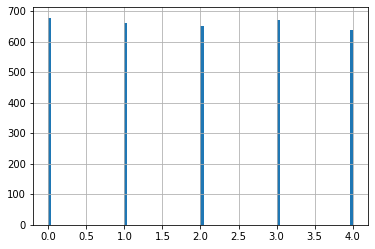

In [17]:
df['popularity'].hist(bins=100)

In [18]:
df.groupby(['popularity']).mean()

,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
popularity,,,,,,,,,,,,
0,243092.625369,0.603578,0.265487,0.632943,0.136374,0.192814,0.551144,-9.815277,0.129244,116.660770,5.353982,3.952802
1,230792.648485,0.629370,0.217538,0.670462,0.062823,0.194687,0.600132,-8.907430,0.121684,118.680945,5.498485,3.954545
2,238637.447005,0.618783,0.164782,0.696496,0.044802,0.185809,0.583942,-7.709054,0.090616,122.543508,5.164363,3.972350
3,238311.373512,0.632536,0.156932,0.704371,0.043969,0.178842,0.586899,-7.180525,0.087131,121.153278,5.349702,3.986607
4,222008.212833,0.672970,0.173120,0.694543,0.020555,0.175391,0.567056,-6.370577,0.100779,120.670083,5.505477,3.968701


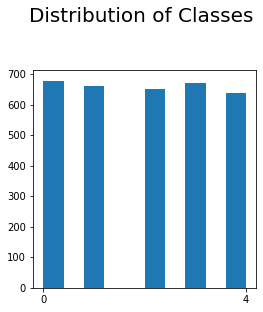

In [19]:
fig, ax = plt.subplots(figsize=(4, 4))
fig.suptitle('Distribution of Classes', fontsize=20, y=1.1, ha="center")
plt.hist(df['popularity'])
ax.xaxis.set_ticks([0,4]) 
plt.show()

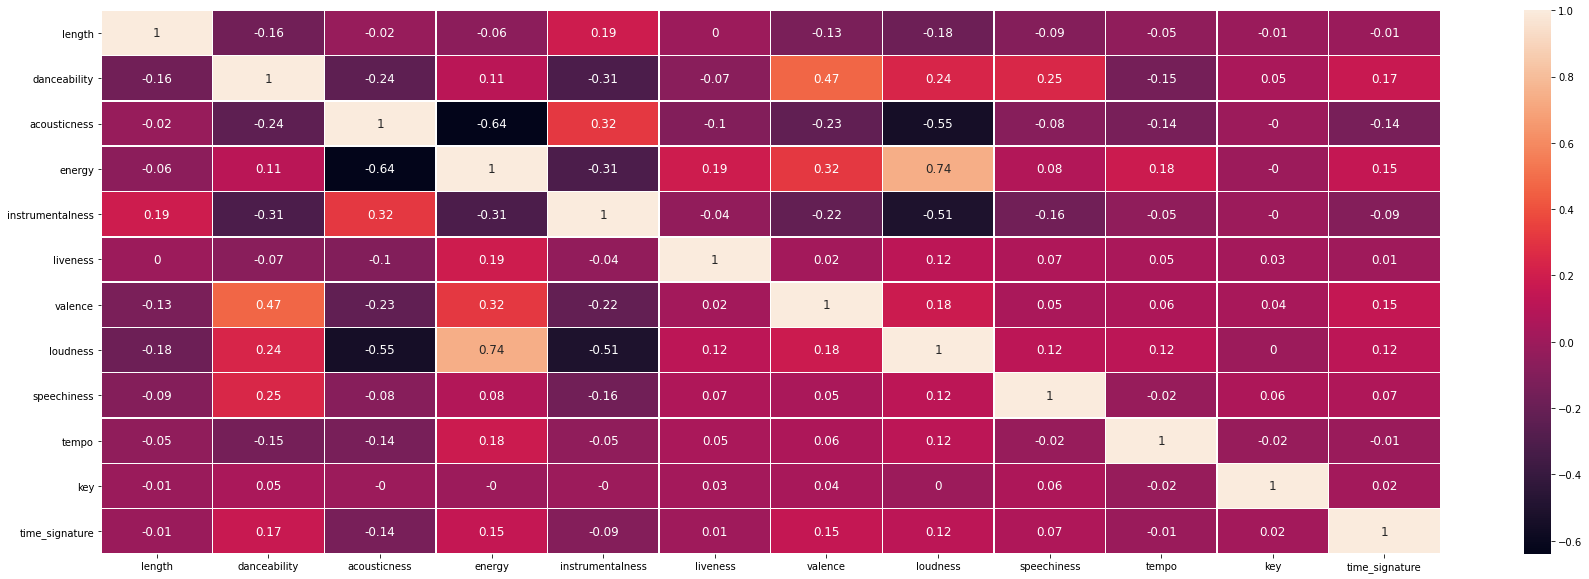

In [20]:
import seaborn as sns
df_heatmap = df.corr().round(2)
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(df_heatmap, annot=True, annot_kws={'size': 12}, linewidths=.5)

In [21]:
def one_hot_encoding(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [22]:
df = one_hot_encoding(df, 'artist', 'artist')

In [23]:
df

popularity  length  danceability  acousticness  energy  instrumentalness  \
0            1  123133         0.684         0.708  0.4980          0.000000   
1            0  162693         0.383         0.314  0.2920          0.000013   
2            1  142773         0.759         0.067  0.6210          0.000291   
3            0  170200         0.647         0.843  0.2820          0.001340   
4            1  125266         0.492         0.470  0.4280          0.000000   
..         ...     ...           ...           ...     ...               ...   
615          0  280000         0.447         0.983  0.1660          0.936000   
616          0  368133         0.141         0.980  0.0471          0.965000   
617          0  335786         0.121         0.963  0.0175          0.920000   
618          1  338253         0.359         0.989  0.0323          0.910000   
619          0  217853         0.298         0.970  0.0324          0.940000   

     liveness  valence  loudness  speechiness    tempo  key  time_signature  \
0      0.3650   0.9050   -10.836       0.0300  131.855    4               4   
1      0.0581   0.5930   -15.230       0.0293  104.789    9               4   
2      0.0623   0.9210   -12.539       0.0314  134.319    5               4   
3      0.1820   0.7530   -15.042       0.0319  132.169    3               4   
4      0.2040   0.8710   -13.132       0.0352  165.776    0               4   
..        ...      ...       ...          ...      ...  ...             ...   
615    0.0826   0.4340   -18.165       0.0308  100.765    2               4   
616    0.1600   0.0440   -27.300       0.0416  101.894    7               4   
617    0.1180   0.0400   -23.596       0.0360  174.673    3               3   
618    0.0938   0.0728   -24.408       0.0377  107.169    1               4   
619    0.1110   0.0796   -26.794       0.0373  124.892    3               4   

     artist_*NSYNC  artist_10 Years  artist_100 Blaze  artist_10cc  \
0                0                0                 0            0   
1                0                0                 0            0   
2                0                0                 0            0   
3                0                0                 0            0   
4                0                0                 0            0   
..             ...              ...               ...          ...   
615              0                0                 0            0   
616              0                0                 0            0   
617              0                0                 0            0   
618              0                0                 0            0   
619              0                0                 0            0   

     artist_112  artist_187 Strassenbande  artist_1PLIKÉ140  \
0             0                         0                 0   
1             0                         0                 0   
2             0                         0                 0   
3             0                         0                 0   
4             0                         0                 0   
..          ...                       ...               ...   
615           0                         0                 0   
616           0                         0                 0   
617           0                         0                 0   
618           0                         0                 0   
619           0                         0                 0   

     artist_1da Banton  artist_2 LIVE CREW  artist_2 Unlimited  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   
..                 ...                 ...                 ...   
615                  0            

In [24]:
df.groupby(['popularity']).mean()

length  danceability  acousticness    energy  \
popularity                                                        
0           243092.625369      0.603578      0.265487  0.632943   
1           230792.648485      0.629370      0.217538  0.670462   
2           238637.447005      0.618783      0.164782  0.696496   
3           238311.373512      0.632536      0.156932  0.704371   
4           222008.212833      0.672970      0.173120  0.694543   

            instrumentalness  liveness   valence  loudness  speechiness  \
popularity                                                                
0                   0.136374  0.192814  0.551144 -9.815277     0.129244   
1                   0.062823  0.194687  0.600132 -8.907430     0.121684   
2                   0.044802  0.185809  0.583942 -7.709054     0.090616   
3                   0.043969  0.178842  0.586899 -7.180525     0.087131   
4                   0.020555  0.175391  0.567056 -6.370577     0.100779   

                 tempo       key  time_signature  artist_*NSYNC  \
popularity                                                        
0           116.660770  5.353982        3.952802       0.000000   
1           118.680945  5.498485        3.954545       0.003030   
2           122.543508  5.164363        3.972350       0.001536   
3           121.153278  5.349702        3.986607       0.002976   
4           120.670083  5.505477        3.968701       0.000000   

            artist_10 Years  artist_100 Blaze  artist_10cc  artist_112  \
popularity                                                               
0                  0.000000           0.00000     0.000000    0.000000   
1                  0.000000           0.00303     0.001515    0.000000   
2                  0.001536           0.00000     0.000000    0.003072   
3                  0.000000           0.00000     0.004464    0.005952   
4                  0.000000           0.00000     0.000000    0.000000   

            artist_187 Strassenbande  artist_1PLIKÉ140  artist_1da Banton  \
popularity                                                                  
0                             0.0059          0.000000           0.000000   
1                             0.0000          0.003030           0.000000   
2                             0.0000          0.001536           0.000000   
3                             0.0000          0.000000           0.001488   
4                             0.0000          0.001565           0.000000   

            artist_2 LIVE CREW  artist_2 Unlimited  artist_21 Savage  \
popularity                                                             
0                     0.004425            0.000000          0.000000   
1                     0.006061            0.000000          0.000000   
2                     0.001536            0.001536          0.001536   
3                     0.000000            0.001488          0.000000   
4                     0.000000            0.000000          0.000000   

            artist_23  artist_2Pac  artist_3 Doors Down  artist_311  \
popularity                                                            
0             0.00000     0.005900             0.000000    0.000000   
1             0.00303     0.000000             0.000000    0.000000   
2             0.00000     0.000000             0.001536    0.000000   
3             0.00000     0.002976             0.001488    0.001488   
4             0.00000     0.003130             0.000000    0.000000   

            artist_3rd Bass  artist_4 Non Blondes  artist_4.4.2  \
popularity                                                        
0                  0.004425              0.001475      0.000000   
1                  0.000000              0.000000      0.000000   
2                  0.000000              0.000000      0.000000   
3                  0.000000              0.000000      0.001488   
4                  0.000000              0.000000      0.000000   

            artist_5 

In [25]:
df.to_csv('dataframe.csv', index=False)